# Tourism Package Analysis



# Problem Statement

The Policy Maker of the Visit with us travel company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.



In [2]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b7df626bc0379711f6b0b96a05ca448448978443cbbde215f2c9ec9faa669936
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling

In [5]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

import seaborn as sns

# Libraries for Imputation, Scaling, OneHotEncoding and Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Libraries to split data
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libraries to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Pandas dataframe options
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)


 # set the background for the graphs
plt.style.use('ggplot')



In [8]:
tourism = pd.read_csv('/content/tour_package.csv')



In [9]:
tourism.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000,Self Enquiry,3,6.000,Salaried,Female,3,3.000,Deluxe,3.000,Single,1.000,1,2,1,0.000,Manager,20993.000
1,200001,0,49.000,Company Invited,1,14.000,Salaried,Male,3,4.000,Deluxe,4.000,Divorced,2.000,0,3,1,2.000,Manager,20130.000
2,200002,1,37.000,Self Enquiry,1,8.000,Free Lancer,Male,3,4.000,Basic,3.000,Single,7.000,1,3,0,0.000,Executive,17090.000
3,200003,0,33.000,Company Invited,1,9.000,Salaried,Female,2,3.000,Basic,3.000,Divorced,2.000,1,5,1,1.000,Executive,17909.000
4,200004,0,NaN,Self Enquiry,1,8.000,Small Business,Male,2,3.000,Basic,4.000,Divorced,1.000,0,5,1,0.000,Executive,18468.000


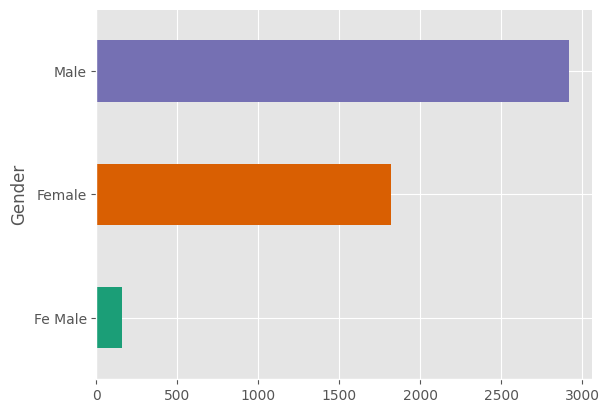

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
tourism.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

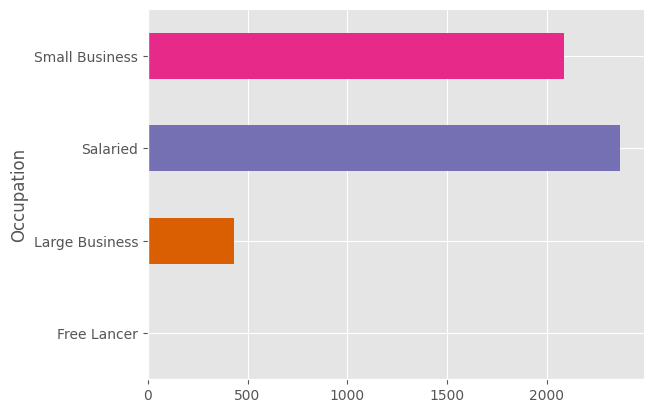

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
tourism.groupby('Occupation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

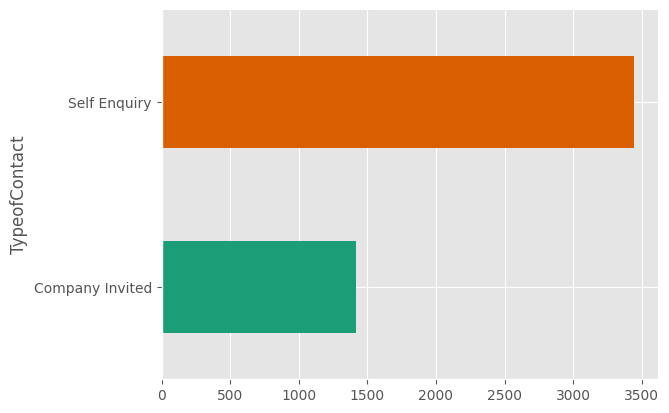

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
tourism.groupby('TypeofContact').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

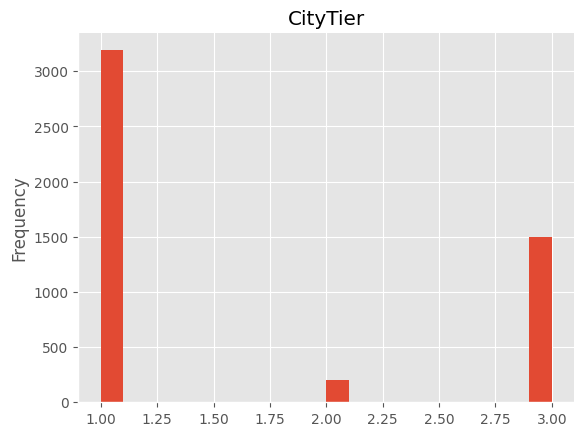

In [11]:
from matplotlib import pyplot as plt
tourism['CityTier'].plot(kind='hist', bins=20, title='CityTier')
plt.gca().spines[['top', 'right',]].set_visible(False)

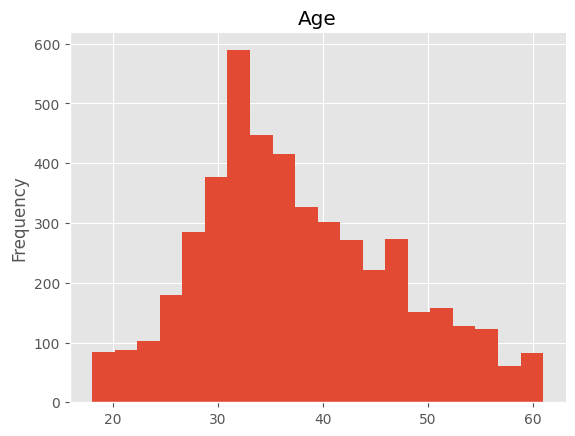

In [10]:
from matplotlib import pyplot as plt
tourism['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
tourism.shape

(4888, 20)

In [17]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Observation: There are missing values in the data.

In [19]:
df_null_summary = pd.concat([tourism.isnull().sum(), tourism.isnull().sum() * 100 /tourism.isnull().count()], axis = 1)
df_null_summary.columns = ['Null Record Count', 'Percentage of Null Records']

In [20]:
df_null_summary.sort_values(by='Percentage of Null Records', ascending=False).style.background_gradient(cmap ='YlOrRd')


,Null Record Count,Percentage of Null Records
DurationOfPitch,251,5.135025
MonthlyIncome,233,4.766776
Age,226,4.623568
NumberOfTrips,140,2.864157
NumberOfChildrenVisiting,66,1.350245
NumberOfFollowups,45,0.920622
PreferredPropertyStar,26,0.531915
TypeofContact,25,0.511457
Designation,0,0.000000
OwnCar,0,0.000000


Observation:

There are almost 5% nulls in DurationofPitch, MonthlyIncome, and Age columns
NumberOfTrips has ~3% null values
NumberOfChildrenVisiting has some null values, but that might mean there were no vising children in the group
NumberOfFollowups, PreferredProprtyStar and TypeOfContact have less than 1% null values

# Summary of the dataset.¶


In [21]:
tourism.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,4888.000,NaN,NaN,NaN,202443.500,1411.188,200000.000,201221.750,202443.500,203665.250,204887.000
ProdTaken,4888.000,NaN,NaN,NaN,0.188,0.391,0.000,0.000,0.000,0.000,1.000
Age,4662.000,NaN,NaN,NaN,37.622,9.316,18.000,31.000,36.000,44.000,61.000
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888.000,NaN,NaN,NaN,1.654,0.917,1.000,1.000,1.000,3.000,3.000
DurationOfPitch,4637.000,NaN,NaN,NaN,15.491,8.520,5.000,9.000,13.000,20.000,127.000
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,3,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888.000,NaN,NaN,NaN,2.905,0.725,1.000,2.000,3.000,3.000,5.000
NumberOfFollowups,4843.000,NaN,NaN,NaN,3.708,1.003,1.000,3.000,4.000,4.000,6.000


Observation:

Minimum Age of customer is 18 and Maximum age is 61 with mean of 37.
Mean Duration of pitch is 15 minutes to max of 127 minutes.
Mean Number of trips is 3 with maximum of 22. There might be outliers to be handled.
Average Monthly Income of customer is 23619 with maximum of 98678. There might be outliers to be handled.
Most of the customers did self-enquiry

### Categorical column statistics

In [22]:
for cat_cols in tourism.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list():
    print('Unique values and corresponding data counts for feature: '+cat_cols)
    print('-'*90)
    df_temp = pd.concat([tourism[cat_cols].value_counts(), tourism[cat_cols].value_counts(normalize=True)*100], axis=1)
    df_temp.columns = ['Count', 'Percentage']
    print(df_temp)
    print('-'*90)

Unique values and corresponding data counts for feature: TypeofContact
------------------------------------------------------------------------------------------
                 Count  Percentage
Self Enquiry      3444      70.820
Company Invited   1419      29.180
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Occupation
------------------------------------------------------------------------------------------
                Count  Percentage
Salaried         2368      48.445
Small Business   2084      42.635
Large Business    434       8.879
Free Lancer         2       0.041
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Gender
------------------------------------------------------------------------------------------
         Count  Percentage
Male      2916      59.656
Female    181

Observation:

The gender column has discrepancy in value (Female and Fe male). We'll fix that in pre-EDA data processing phase.
We'll re-visit the percentage distributions during EDA, and jot down the observations after looking at the distribution visuals.

### Pre-EDA Data Preprocessing

**Dropping ID column**

In [23]:
tourism.drop(columns=['CustomerID'], inplace=True)


**Fixing Gender Value**


In [24]:
tourism.Gender.value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [25]:
tourism['Gender'] = tourism['Gender'].str.replace(' ', '').str.capitalize()
tourism.Gender.value_counts()


Male      2916
Female    1972
Name: Gender, dtype: int64

**Data type conversions**

Converting the data type of the category variables from object/float to category



In [26]:
category_columns = ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched' \
                   , 'MaritalStatus', 'Passport', 'OwnCar', 'Designation']

In [27]:
tourism[category_columns] = tourism[category_columns].astype('category')

**Standardizing column names**

Removing the spaces from column names, and standardizing the column names to lower case

In [28]:
tourism.columns = [i.replace(" ", "_").lower() for i in tourism.columns]

In [29]:
tourism.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   prodtaken                 4888 non-null   category
 1   age                       4662 non-null   float64 
 2   typeofcontact             4863 non-null   category
 3   citytier                  4888 non-null   category
 4   durationofpitch           4637 non-null   float64 
 5   occupation                4888 non-null   category
 6   gender                    4888 non-null   category
 7   numberofpersonvisiting    4888 non-null   int64   
 8   numberoffollowups         4843 non-null   float64 
 9   productpitched            4888 non-null   category
 10  preferredpropertystar     4862 non-null   float64 
 11  maritalstatus             4888 non-null   category
 12  numberoftrips             4748 non-null   float64 
 13  passport                  4888 non-null   catego

Create bins for Age and Monthly Income


In [31]:
tourism[['age', 'monthlyincome']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4662.000,37.622,9.316,18.000,31.000,36.000,44.000,61.000
monthlyincome,4655.000,23619.853,5380.698,1000.000,20346.000,22347.000,25571.000,98678.000


In [32]:
# Creating categories from Age and Monthly Income to analyze the trend of borrowing Personal Loan

tourism['age_bin'] = pd.cut(
    x=tourism['age'],
    bins=[18, 30, 40, 50, 61],
    labels=["18-30", "31-40", "41-50", "50+"],
)

tourism['income_bin'] = pd.cut(
    x=tourism['monthlyincome'],
    bins=[1000, 10000, 25000, 50000, 80000, 100000],
    labels=["1K - 10K", "10K+ - 25K", "25K+ - 50K", "50K+ - 80K", "80K+"],
)

### Exploratory Data Analysis


**Percentage on bar chart for Categorical Features**

In [45]:
# Below code plots grouped bar for each categorical feature

def perc_on_bar(data: pd.DataFrame, cat_columns, target, hue=None, perc=True):
    '''
    The function takes a category column as input and plots bar chart with percentages on top of each bar

    Usage:
    ------

    perc_on_bar(df, ['age'], 'prodtaken')
    '''

    subplot_cols = 2
    subplot_rows = int(len(cat_columns)/2 + 1)
    plt.figure(figsize=(16,5*subplot_rows))
    for i, col in enumerate(cat_columns):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = data[col].value_counts(ascending=False).index  # Data order
        ax=sns.countplot(data=data, x=col, palette = 'crest', order=order, hue=hue);
        for p in ax.patches:
            percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(data[target]), p.get_height())
            # Added percentage and actual value
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 40
            if perc:
                plt.annotate(percentage, (x, y), ha='center', color='black', fontsize='medium'); # Annotation on top of bars
            plt.xticks(color='black', fontsize='medium', rotation= (-90 if col=='region' else 0));
            plt.tight_layout()
            plt.title(col.capitalize() + ' Percentage Bar Charts\n\n')

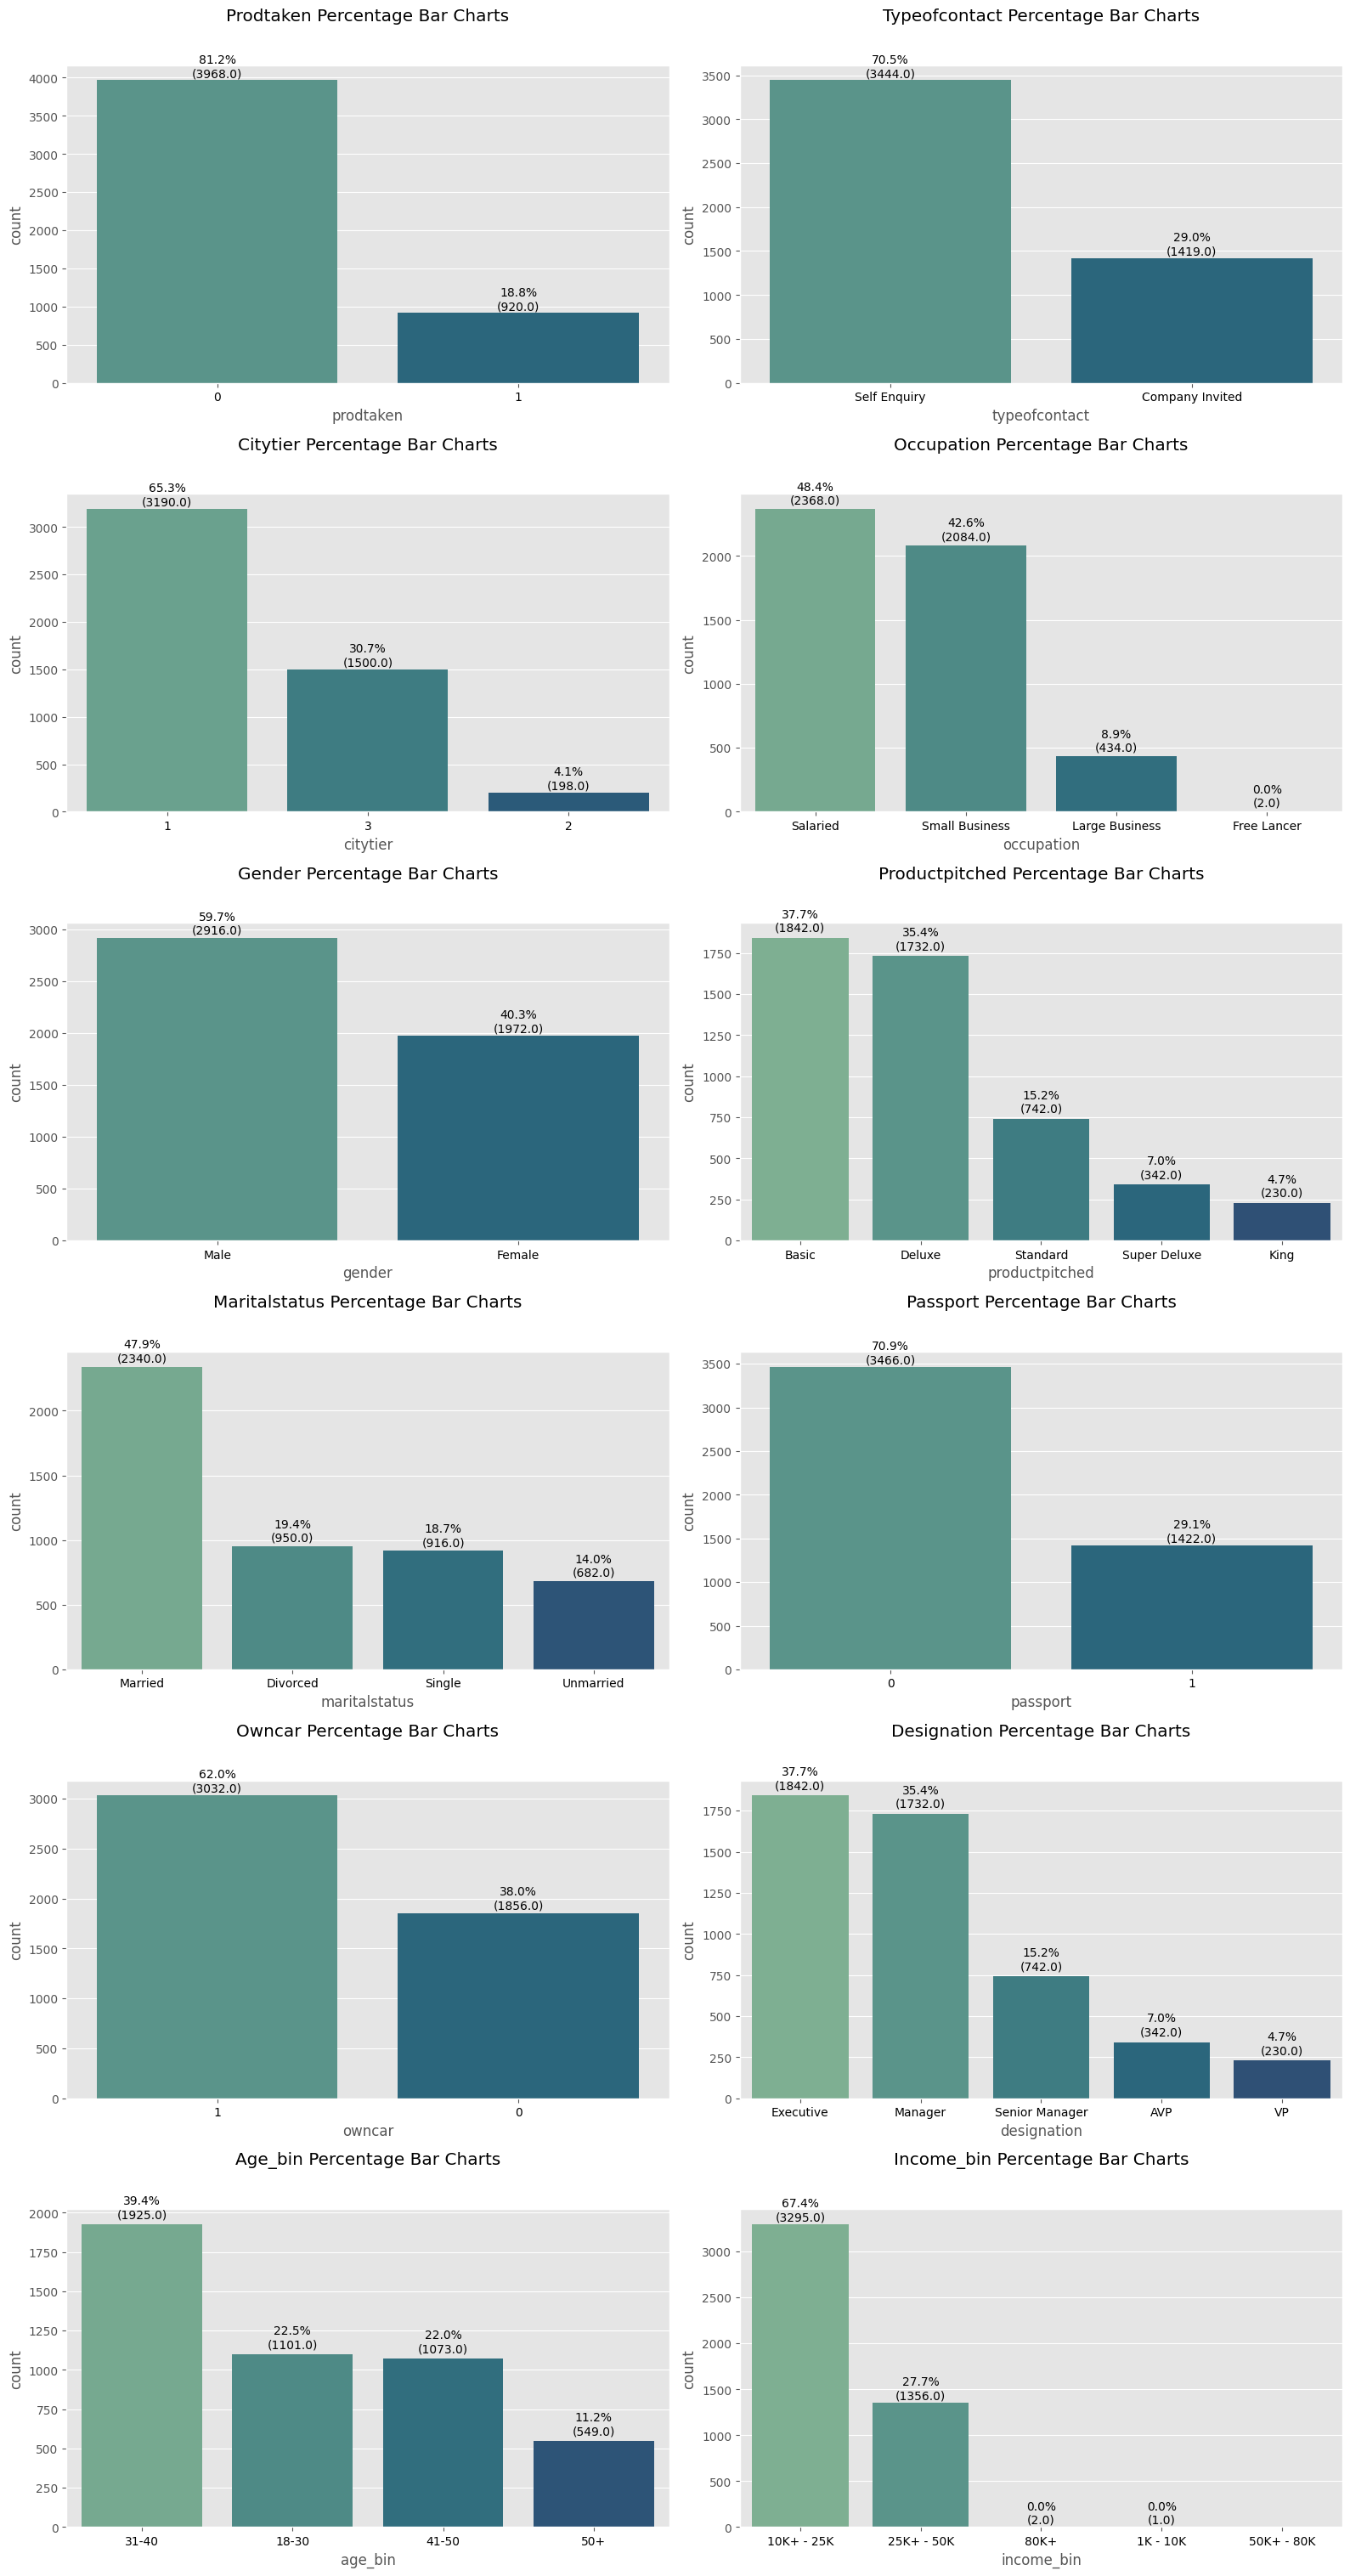

In [47]:
category_columns = tourism.select_dtypes(include='category').columns.tolist()
target_variable = 'prodtaken'
perc_on_bar(tourism, category_columns, target_variable)

Observation:

*   38% customers are Executive, followed by 35% managers.
*   18% customers accepted product offered last time.
*   62% customer own car
*   29% customers has a passport.
*   65% customers are from Tier 1 cities.
*   61% customers prefer 3 star property.
*   48% customers are married.
*   Basic package was pitched to 38% of customers and 35% were pitched Deluxe package.
*   Occupation of 49% customer is salaried.
*   60% customers are male.
*   70.5% customer self-enquired for the packages.
*   67% of customer monthly income is in 10K + to 25K range.
*   39% are in 31-40 Age group. Only ~11% customers are aged 50+.


**Bi-variate Analysis**

Goal of Bi-variate analysis is to find inter-dependencies between features.



In [52]:
# Below code plots box charts for each numerical feature by each type of Personal Loan (0: Not Borrowed, 1: Borroed)
def box_by_target(numeric_columns, target, include_outliers):
    '''
    The function takes a category column, target column, and whether to include outliers or not as input
    and plots bar chart with percentages on top of each bar

    Usage:
    ------

    perc_on_bar(['age'], 'prodtaken', True)
    '''
    subplot_cols = 2
    subplot_rows = int(len(numeric_columns)/2 + 1)
    plt.figure(figsize=(16,8*subplot_rows))
    for i, col in enumerate(numeric_columns):
        plt.subplot(8,2,i+1)
        sns.boxplot(data=tourism, x=target, y=col, orient='vertical', palette="Blues", showfliers=include_outliers)
        plt.xticks(ticks=[0,1], labels=['Not Opted (0)', 'Opted (1)'])
        plt.tight_layout()
        plt.title(str(i+1)+ ': '+ target +' vs. ' + col, color='black')


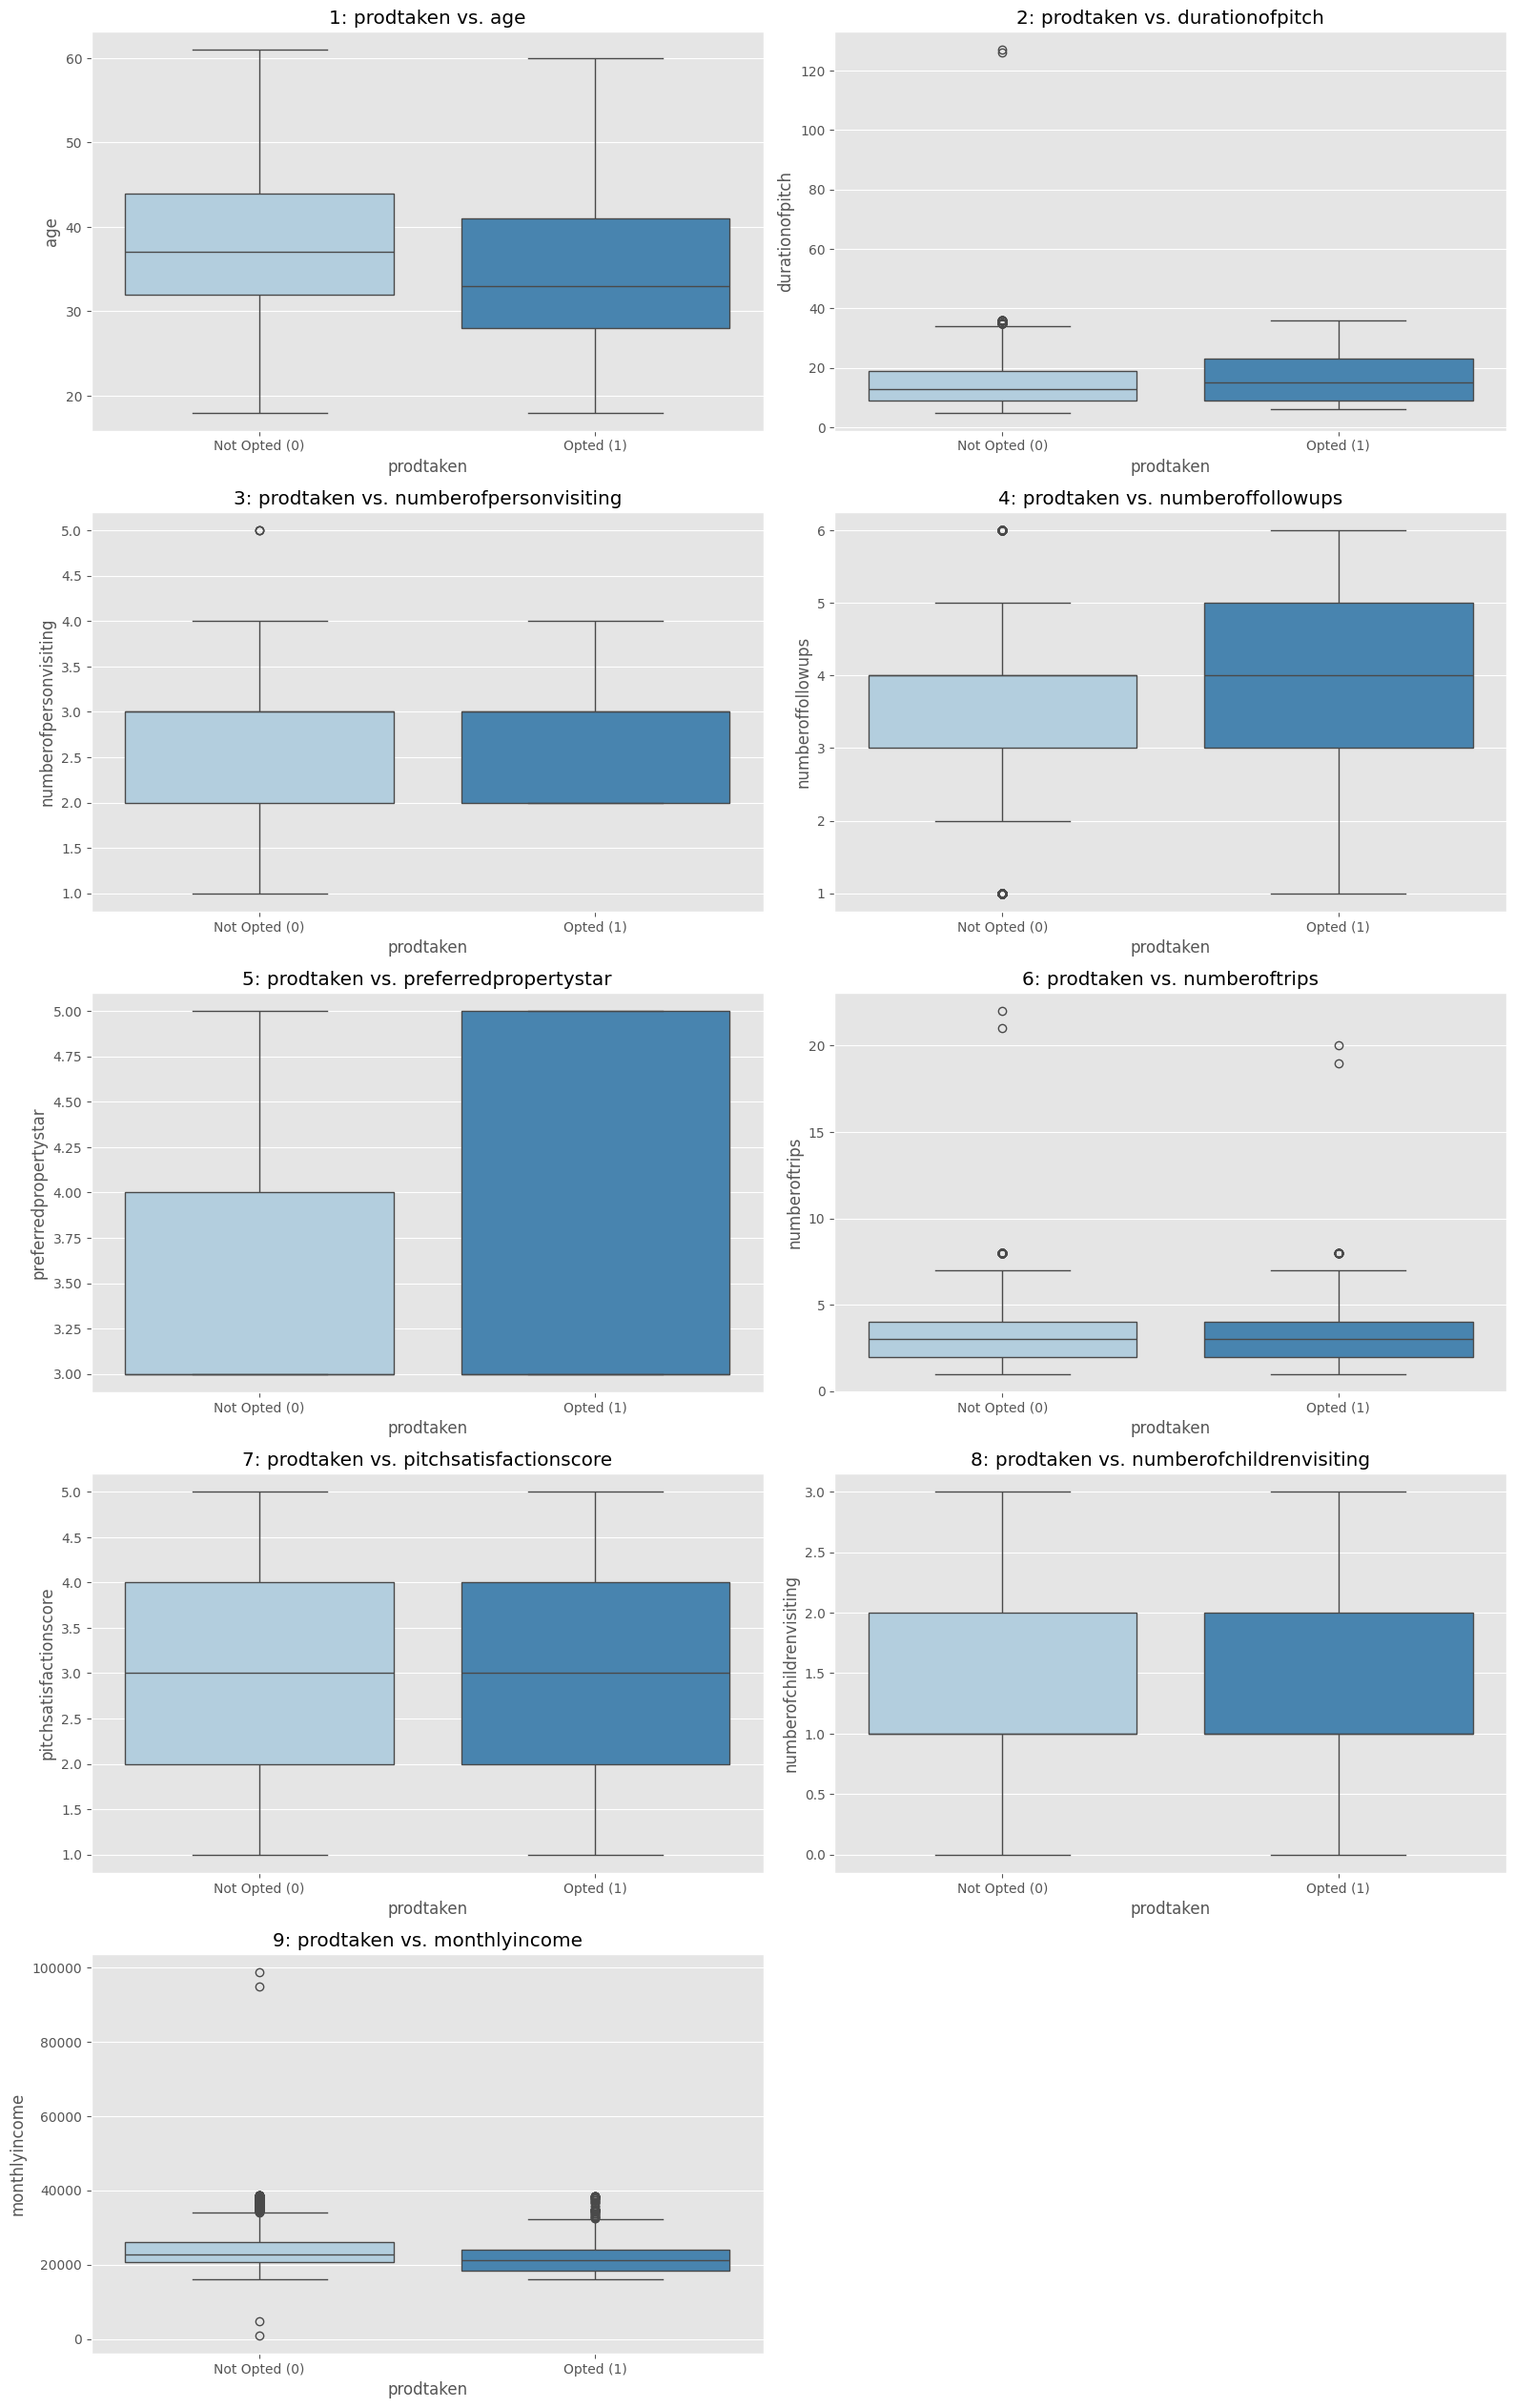

In [53]:
numeric_columns = tourism.select_dtypes(exclude='category').columns.tolist()
target_variable = 'prodtaken'
box_by_target(numeric_columns, target_variable, True)

Observation:

*   Younger people seem to have opted travel package slightly more than the older people
*   People who had had more follow-ups, tend to purchase a package
*   People who preferred highly rated properties, tend to purchase travel package







**Target vs. All Categorical Columns**

In [54]:
# Create a function that returns a Pie chart and a Bar Graph for the categorical variables:
def cat_view(x, target):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm
    color1 = cm.inferno(np.linspace(.4, .8, 30))
    color2 = cm.viridis(np.linspace(.4, .8, 30))
    sns.set_palette('cubehelix')
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))


    """
    Draw a Pie Chart on first subplot.
    """
    s = tourism.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax[0].pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax[0].legend(wedges, mydata_index,
              title=x.capitalize(),
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12)

    ax[0].set_title(f'{x.capitalize()} Pie Chart')

    """
    Draw a Bar Graph on second subplot.
    """

    df = pd.pivot_table(tourism, index = [x], columns = [target], values = ['monthlyincome'], aggfunc = len)

    labels = df.index.tolist()
    loan_no = df.values[:, 0].tolist()
    loan_yes = df.values[:, 1].tolist()

    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax[1].bar(l - width/2, loan_no, width, label='Not Opted', color = color1)
    rects2 = ax[1].bar(l + width/2, loan_yes, width, label='Opted', color = color2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel('Scores')
    ax[1].set_title(f'{x.capitalize()} Bar Graph')
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()

    def autolabel(rects):

        """Attach a text label above each bar in *rects*, displaying its height."""

        for rect in rects:
            height = rect.get_height()
            ax[1].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        fontsize = 'medium',
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

    """
    Draw a Stacked Bar Graph on bottom.
    """

    sns.set(palette="tab10")
    tab = pd.crosstab(tourism[x], tourism[target].map({0:'Not Opted', 1:'Opted'}), normalize="index")

    tab.plot.bar(stacked=True, figsize=(16, 3))
    plt.title(x.capitalize() + ' Stacked Bar Plot')
    plt.legend(loc="upper right", bbox_to_anchor=(0,1))
    plt.show()

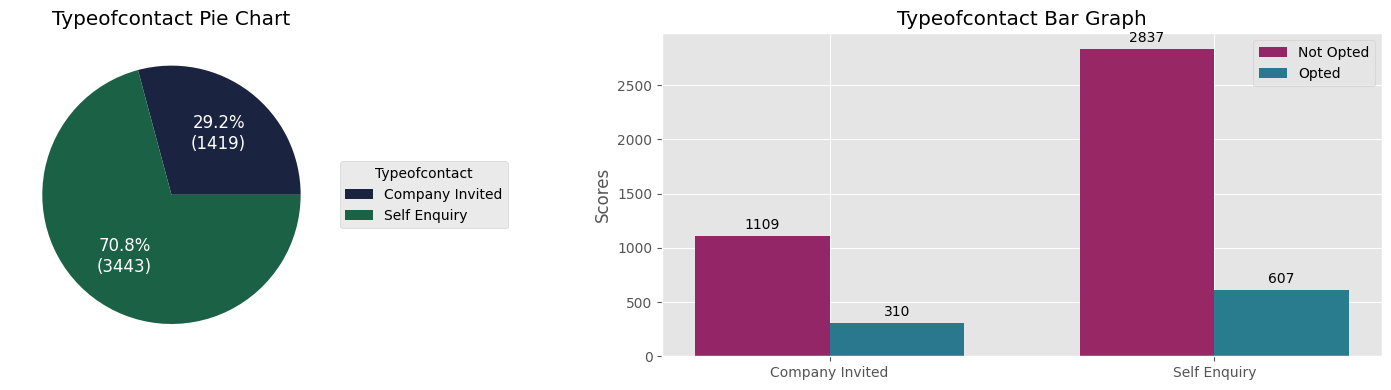

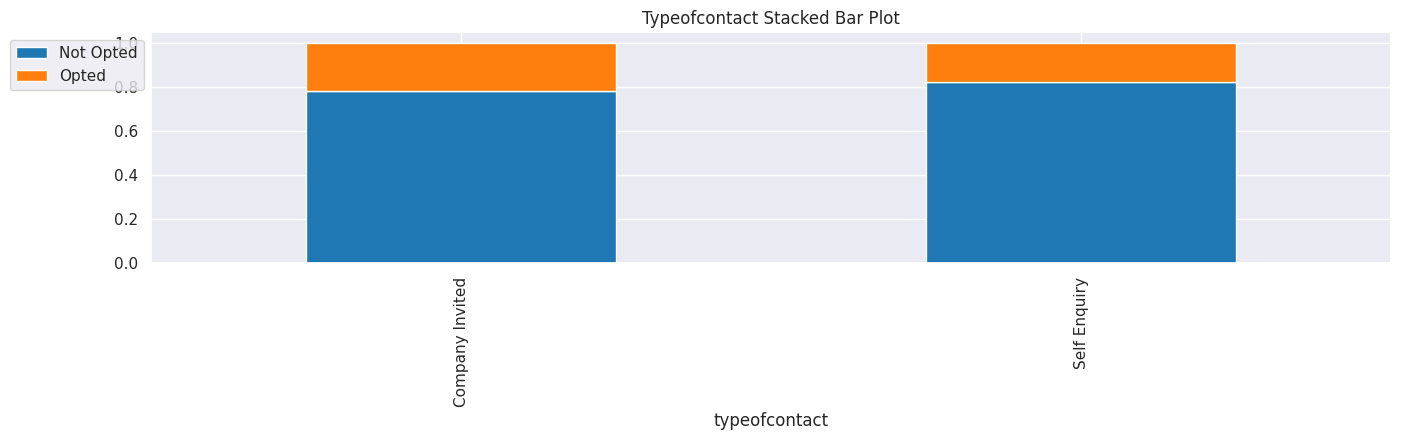

In [55]:
cat_view('typeofcontact', 'prodtaken')

Observation:

*   Most of the customers did self-enquiry
*   However, whether customer chose to take a product or not, appears to be not dependent on type of contact






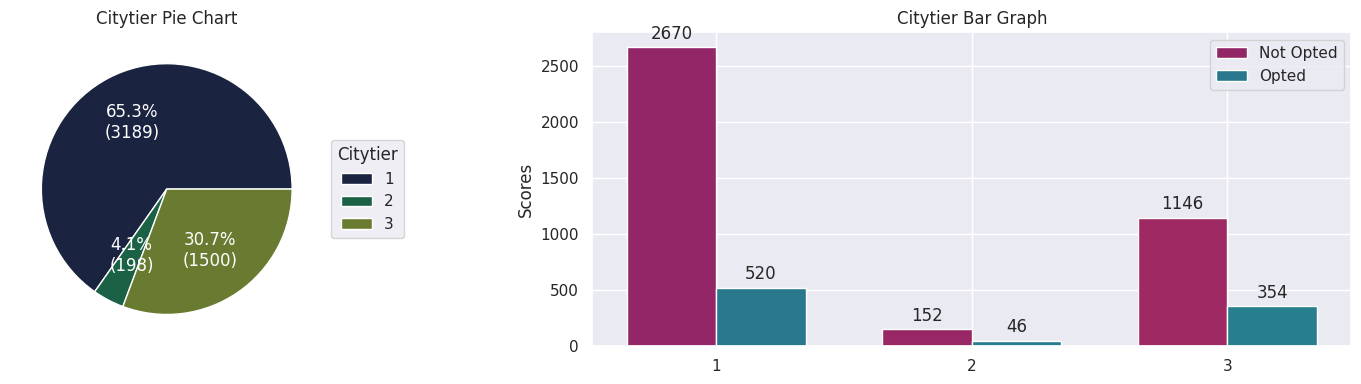

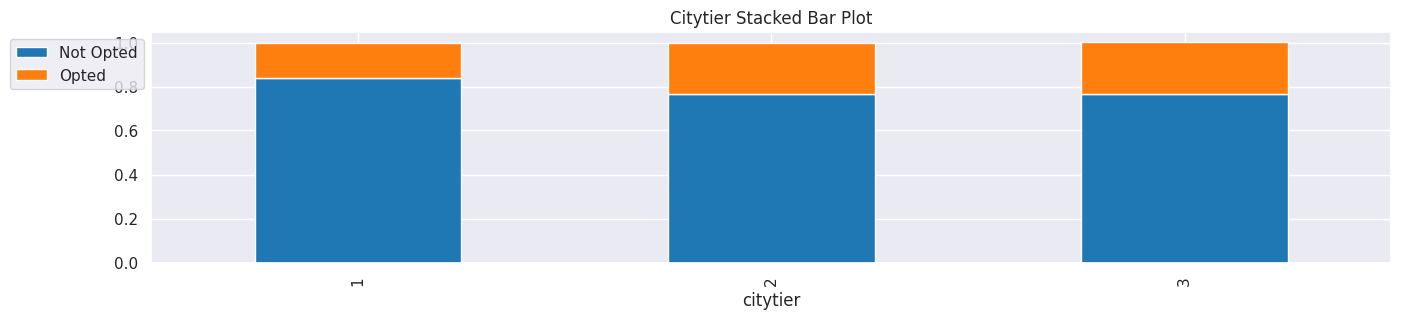

In [56]:
cat_view('citytier', 'prodtaken')

Observation:

*   Most of the customers are from Tier 1 Cities
*   Tier 2 and 3 residents seem to be slightly more interested in purchasing travel packages




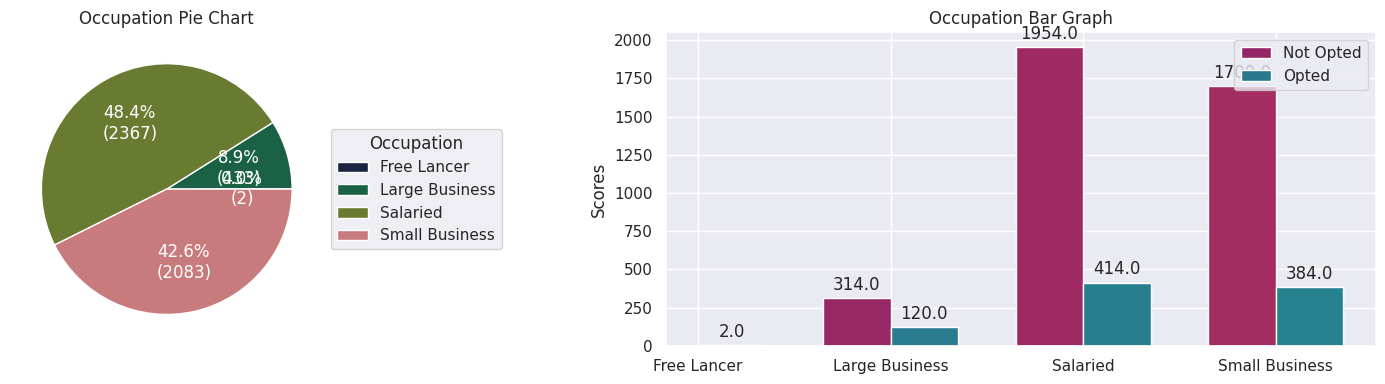

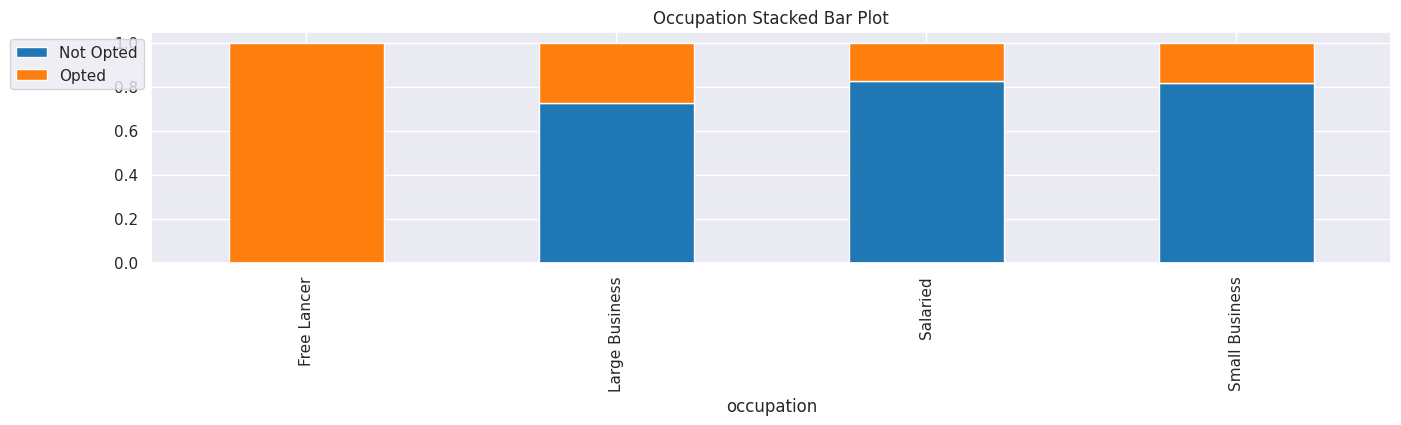

In [57]:
cat_view('occupation', 'prodtaken')


Observation:



*   Most of the customers are salaried or running Small Business. Together they contribute to 81% of our customer base.
*   There are only 2 freelancers who actually purchased a travel package.
*   Other than that, large business running people tend to opt for purchasing a package more than salaried and small business running people.




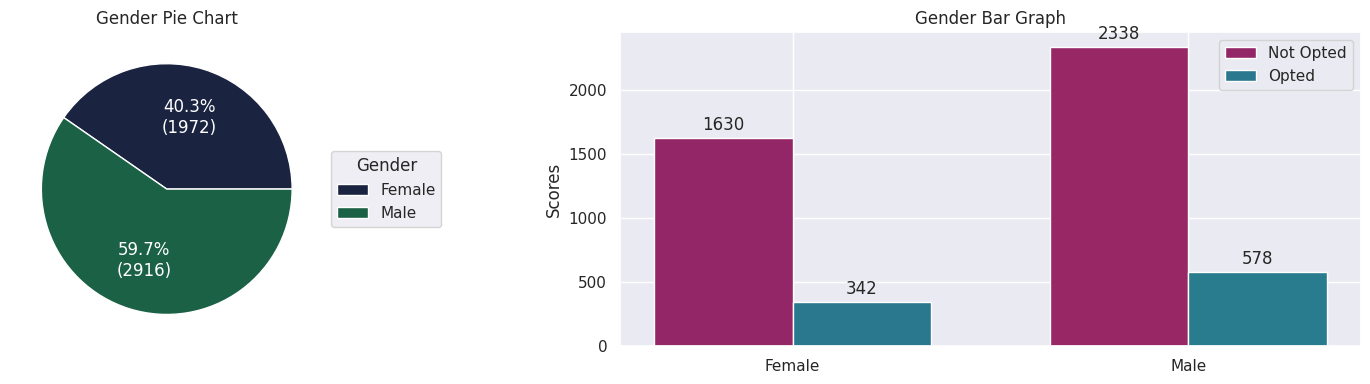

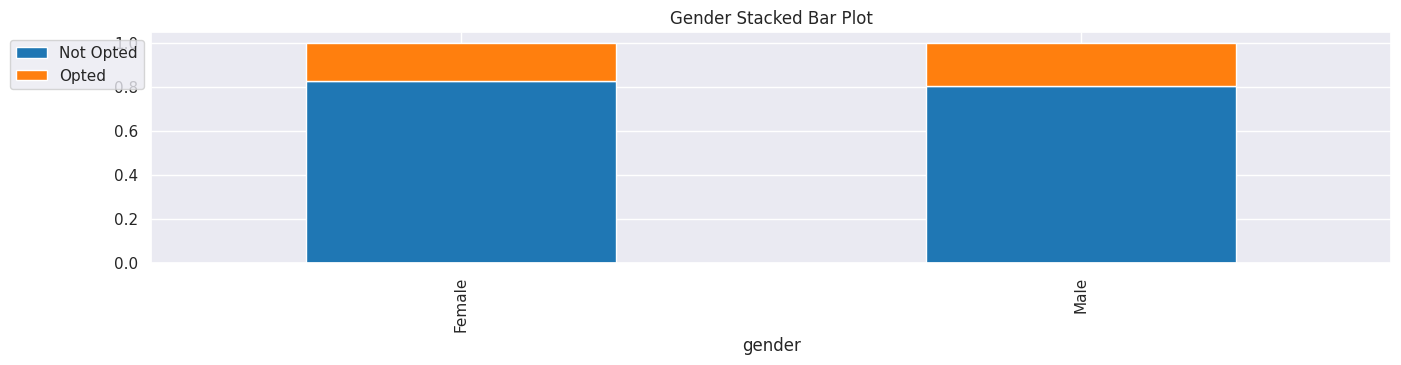

In [58]:
cat_view('gender', 'prodtaken')


Observation:


*   Almost 60% of our customers are Male
*   Tendency of purchasing a travel package doesn't seem to be impacted by gender of customer




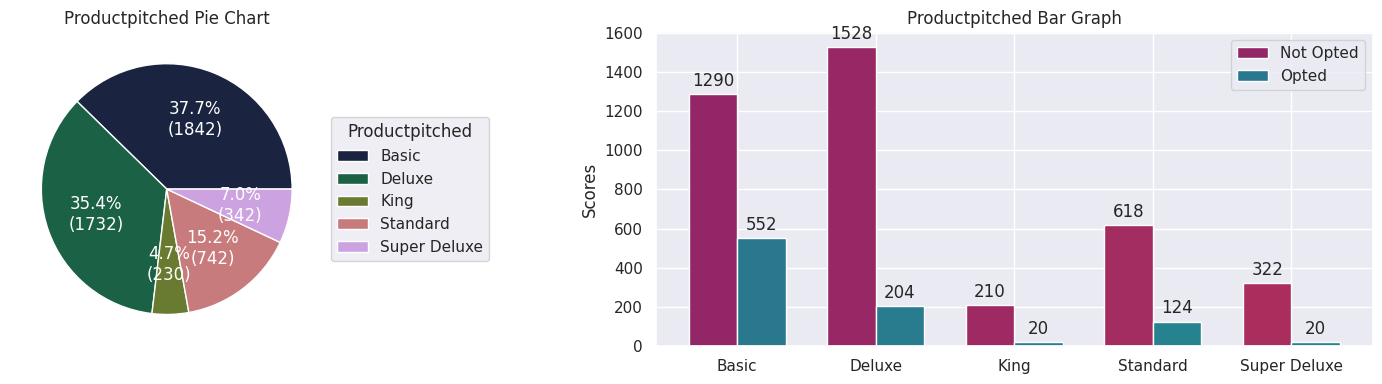

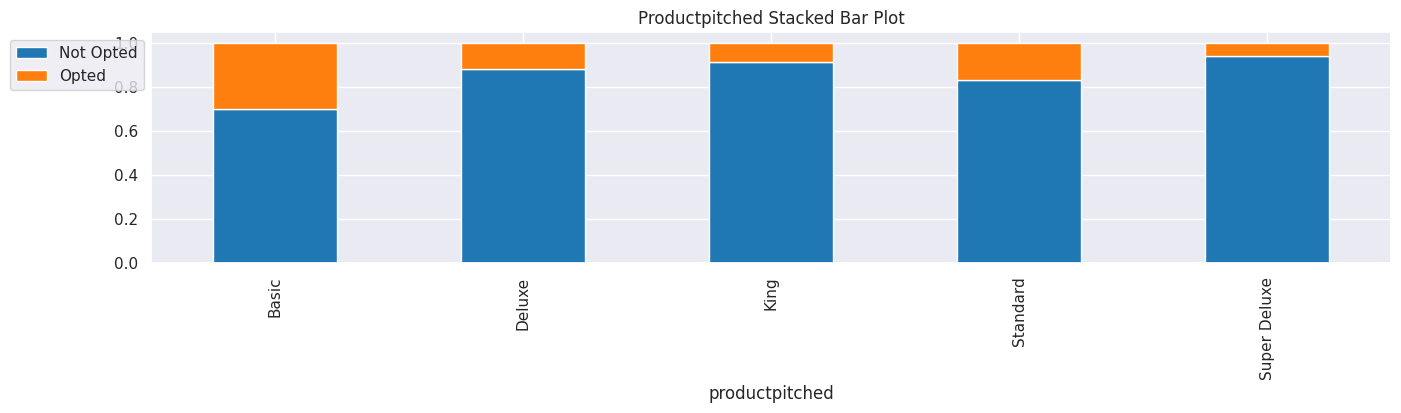

In [59]:
cat_view('productpitched', 'prodtaken')


Observation:


*   Basic and Deluxe are the two packages pitched to most of the customers
*   People tend to purchase travel package more when they were pitched with Basic package, and Standard package




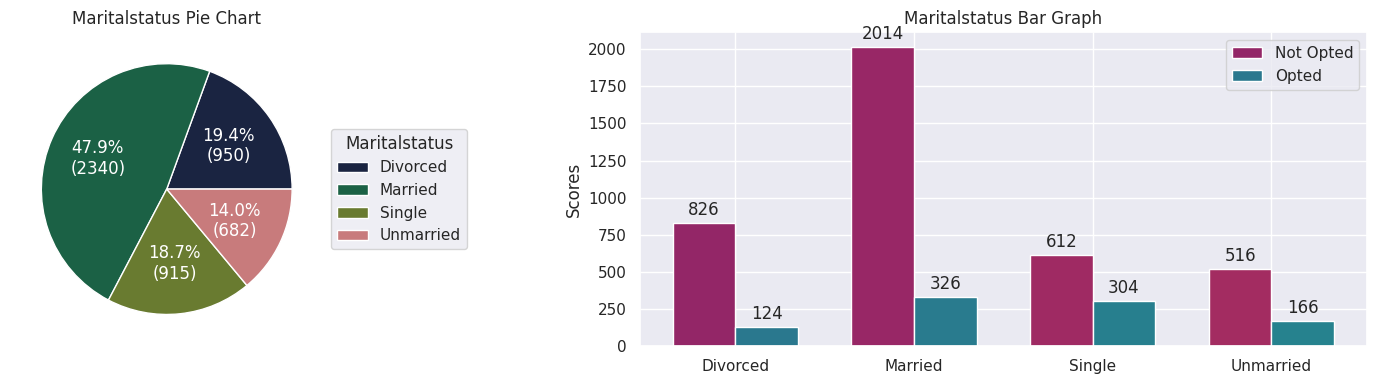

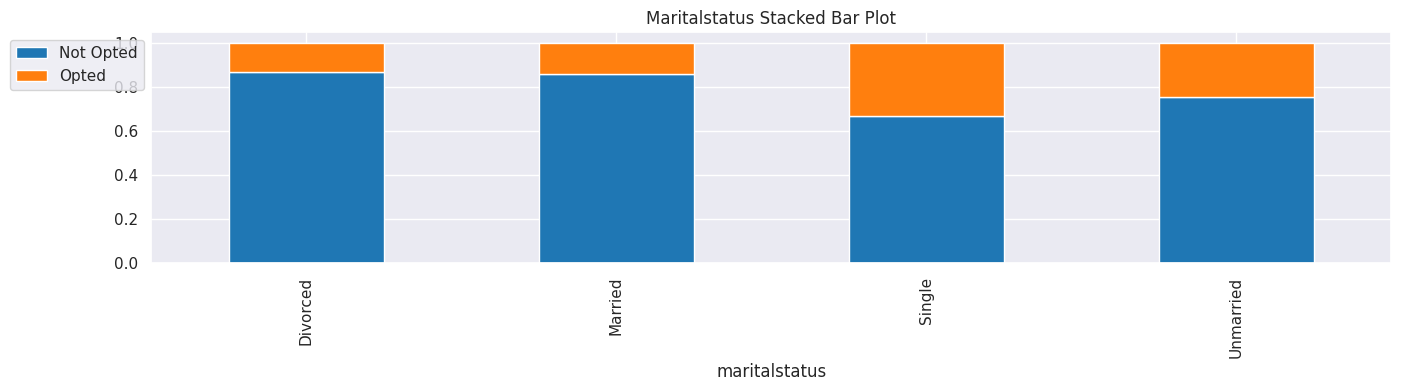

In [60]:
cat_view('maritalstatus', 'prodtaken')


Observation:


*   Most of the customers are married
*   Single and Unmarried people tend to buy travel package more than other categories




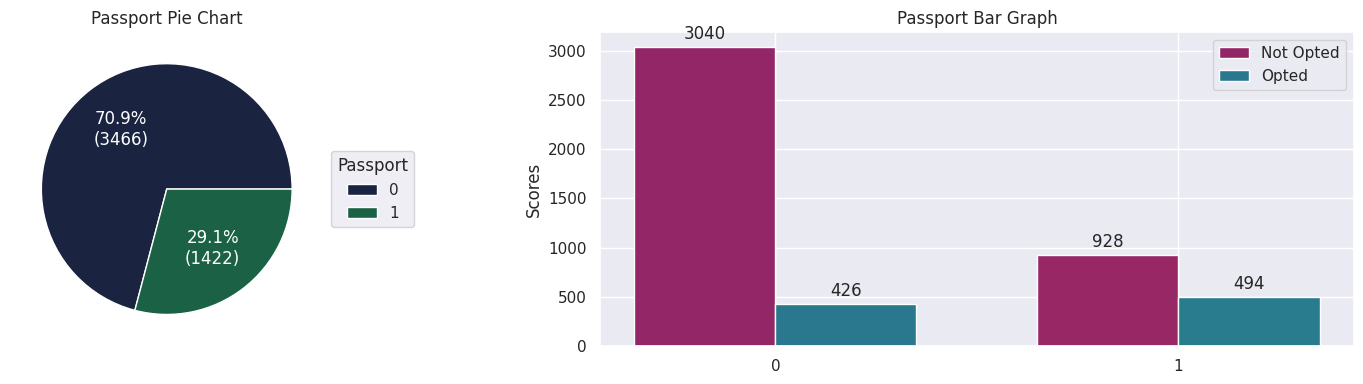

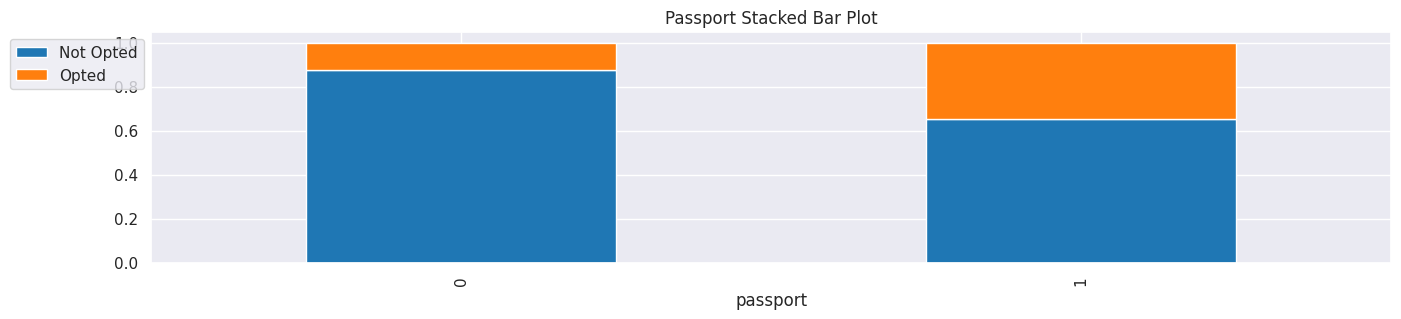

In [61]:
cat_view('passport', 'prodtaken')


Observation:


*   Most of the customers do not have a passport
*   People having passport purchased travel package more





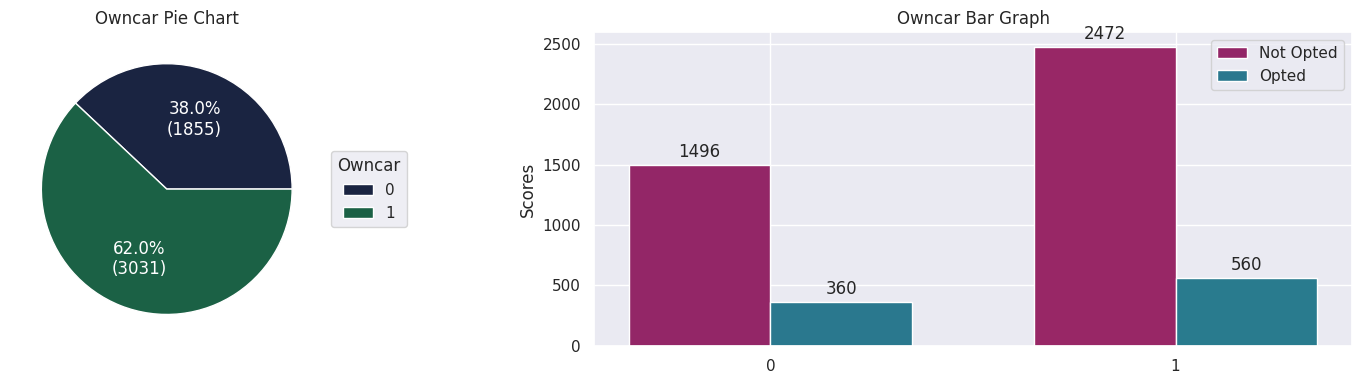

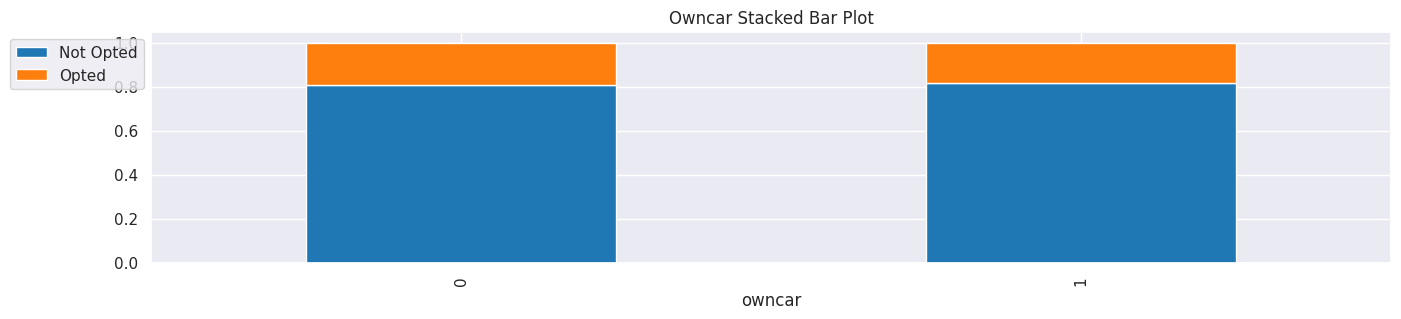

In [62]:
cat_view('owncar', 'prodtaken')

Observation:


*   Most of the customers own car
*   Owning a car does not seem to have any impact on purchasing travel package tendency





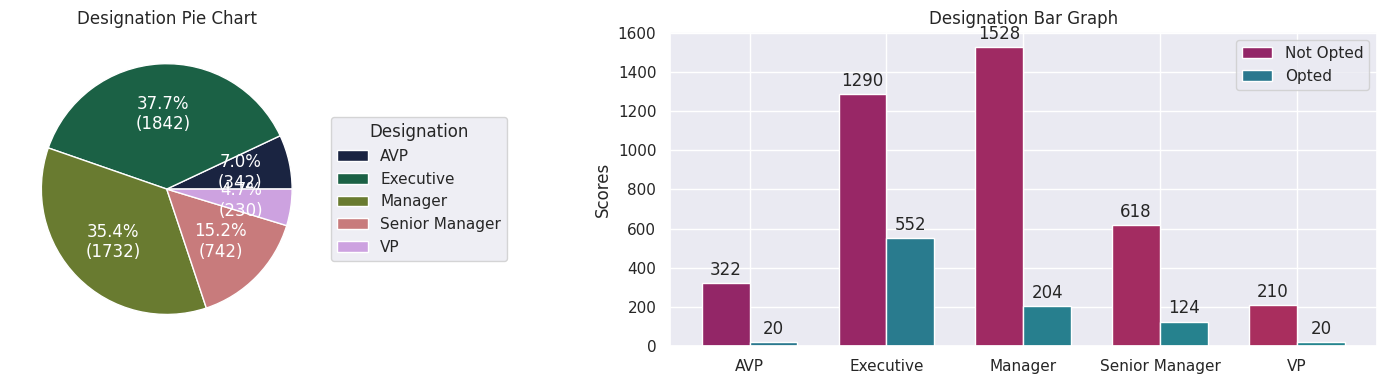

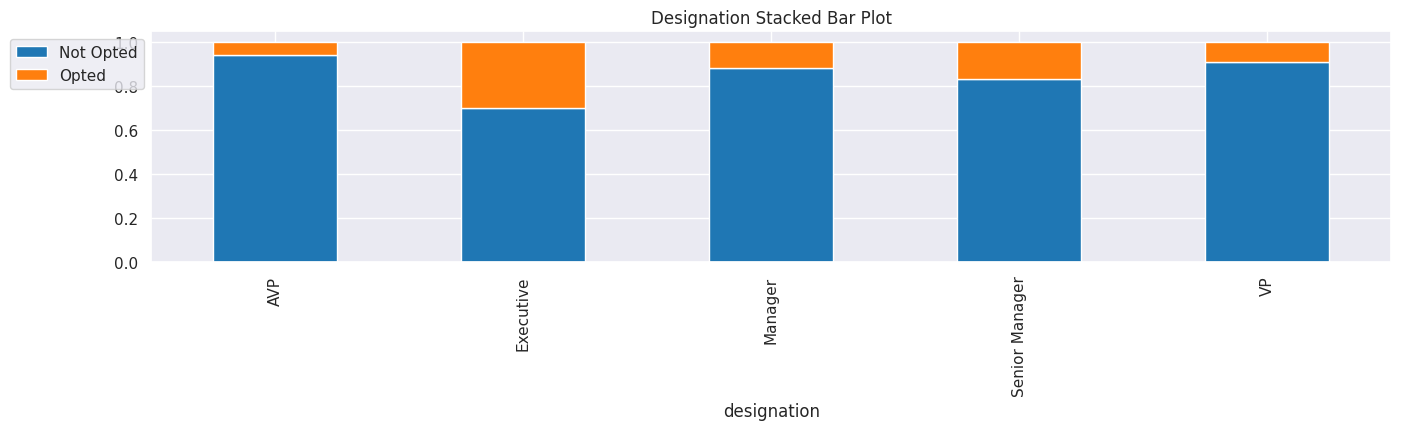

In [63]:
cat_view('designation', 'prodtaken')


Observation:


*   Most of the customers are Executives and Managers
*   Executives seems to have higher tendency of buying travel package




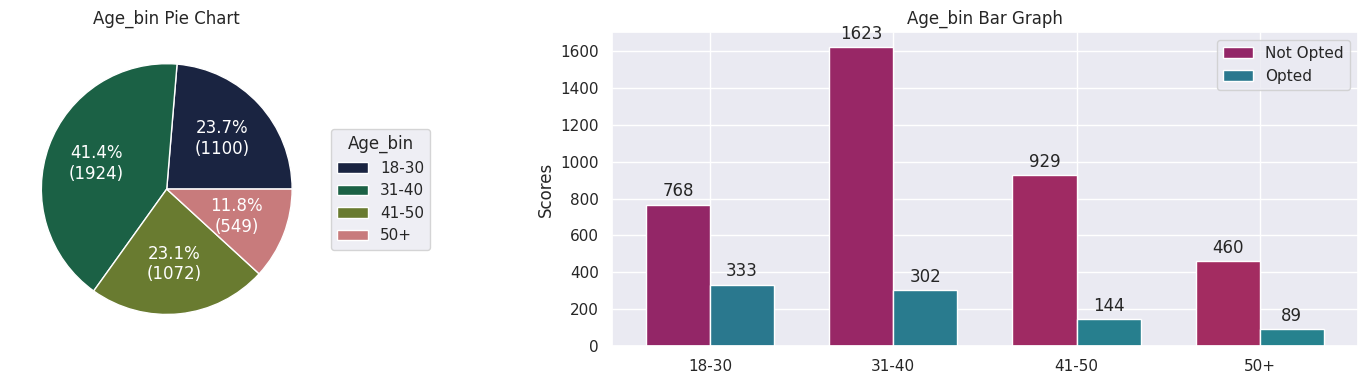

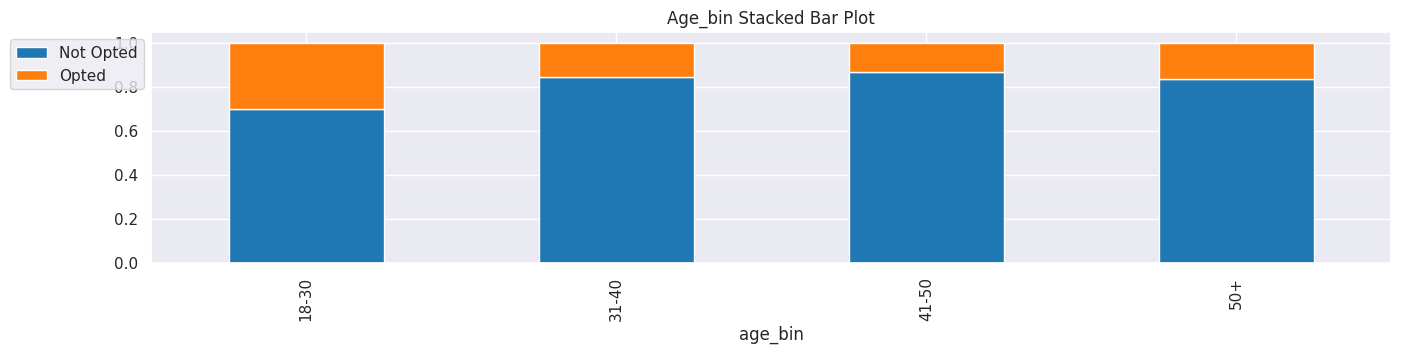

In [64]:
cat_view('age_bin', 'prodtaken')

Observation:

*   Most of the customers are in 31-40 years age range
*   18-30 years aged people have tendency to buy travel package compared to other age groups





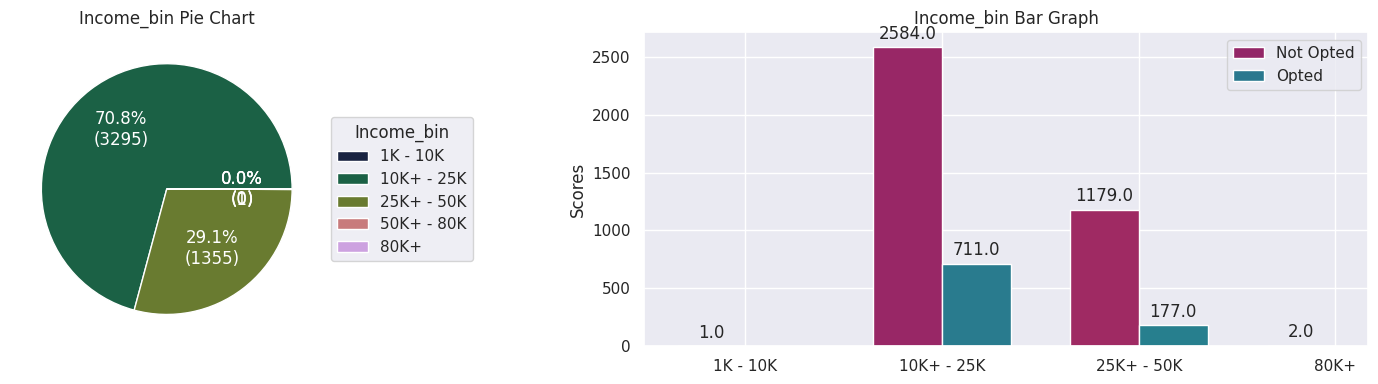

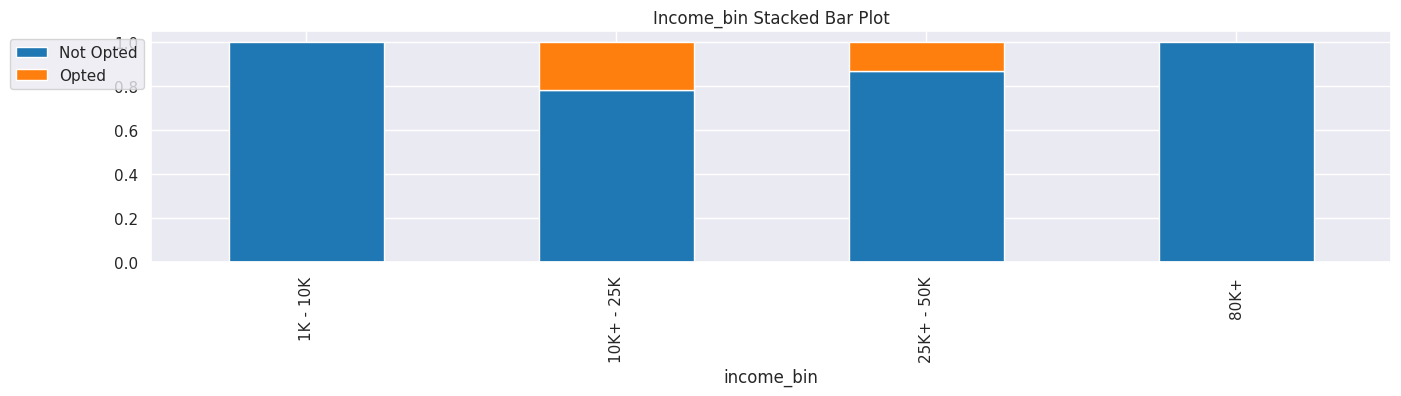

In [65]:
cat_view('income_bin', 'prodtaken')


Observation:

*   Most of the customers are in the 10K+ to 25K monthly income range
*   Customers earning less than 10K or more than 50K per month, did not buy travel package


Important features

According to the bi-variate analysis so far, the important measures that might impact tendency of purchasing a travel package, are:


*   Age/Age bin
*   Number of follow-ups
*   Preferred property rating
*   Income/Income bin
*   City Tier
*   Occupation
*   Product Pitched
*   Marital Status
*   Passport
*   Designation


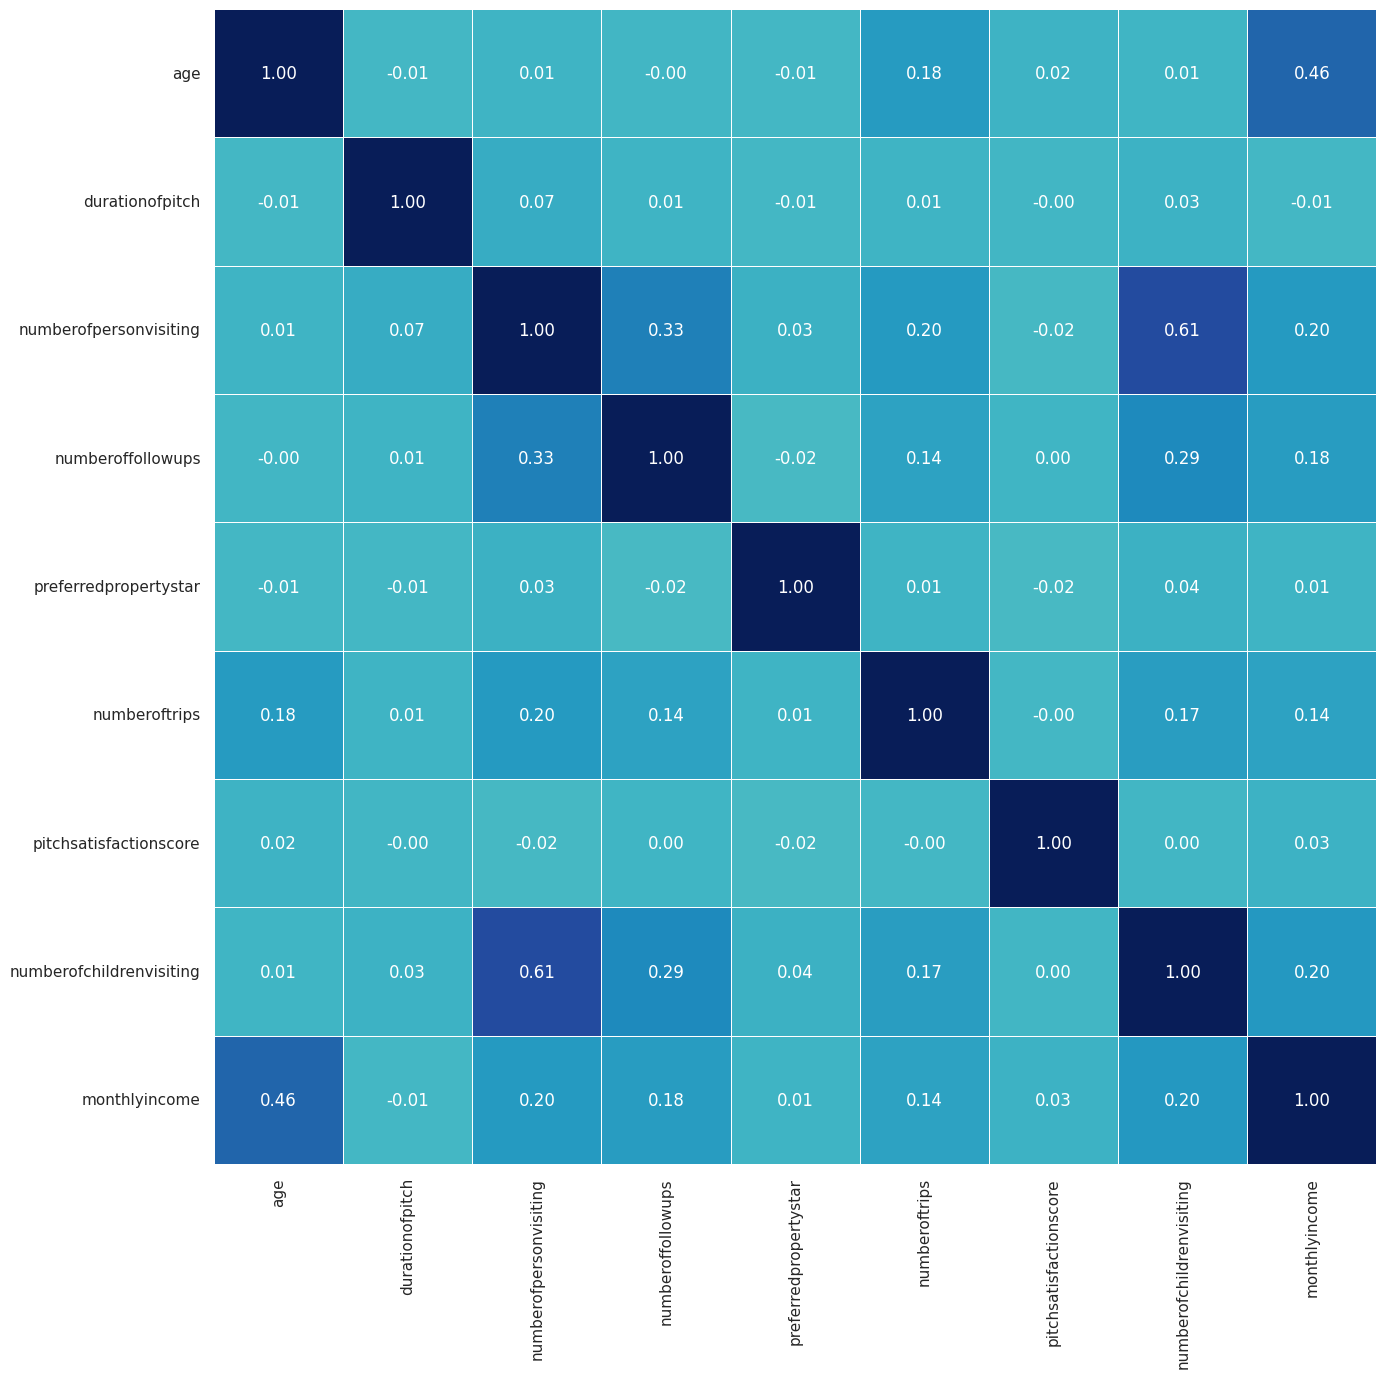

In [66]:
# Plotting correlation heatmap of the features

sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    tourism.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

Observation:


*   Number of Persons Visting as expected has good positive correlation with Number of Children Visting
*   Monthly Income shows moderate positive correlation with Age


